In [58]:
!pip install --upgrade scikit-learn

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\iny8251\\AppData\\Local\\anaconda3\\Lib\\site-packages\\~klearn\\cluster\\_dbscan_inner.cp310-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




     ---------------------------------------- 9.2/9.2 MB 7.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.1
    Uninstalling scikit-learn-1.2.1:
      Successfully uninstalled scikit-learn-1.2.1


In [1]:
import pandas as pd, numpy as np

In [2]:
clust_attr = pd.read_csv('Cluster_Non_Null_Attribs_081523.csv')

In [3]:
clust_attr.head(50)

,ClusterLabel,Cluster Name,Cluster Size,Non-Null Attributes
0,0,"PARTY EVERYDAY,NOVELTY AND DECOR,GIFT-WRAP SEA...",1306,"['Color', 'Size Description', 'Other Size Desc..."
1,1,"ACCENT FURNITURE,KITCHEN/DINING,DECORATIVE ACC...",1145,"['Genre', 'Color', 'Size Description', 'Other ..."
2,2,"TEA BAGS & BULK TEA,TEA SWEETENED,TEA BAGS/HER...",1086,"['Method of Sweetening', 'Level of Sugar/Sucro..."
3,3,CARDS EVERYDAY,1085,"['VND_BRN_NAM', 'NET_CONT_EQV_UOM_VIP_TO_KRG_U..."
4,4,"COLD WEATHER ACS,BRANDED COLLECTIONS,JUNIOR SL...",991,"['Color', 'Size Description', 'Other Size Desc..."
5,5,"PLANT STANDS & ACCESSORIES,WALL ART,NOVELTY AN...",938,"['Color', 'ASBD_ACU_PDT_HGT_IN_INCH', 'ASBD_AC..."
6,6,"CARDS EVERYDAY,CARD GAMES",909,"['VND_BRN_NAM', 'NET_CONT_EQV_UOM_VIP_TO_KRG_U..."
7,7,"CAKES: CUPCAKES,CAKES: LAYERS,CAKES: SHEET,CAK...",841,"['Method of Sweetening', 'Level of Sugar/Sucro..."
8,8,"HOME OFFICE,ACCENT FURNITURE,KITCHEN ACCESSORI...",844,"['Color', 'Size Description', 'Other Color', '..."
9,9,"BOISE STATE UNIVERSITY,OSU COLLEGIATE,UO COLLE...",830,"['Color', 'Size Description', 'Other Size Desc..."


In [4]:
clust_attr.tail()

,ClusterLabel,Cluster Name,Cluster Size,Non-Null Attributes
7153,7154,"MARIKA CURVES,MARIKA,4-16 BOTTOMS,SNACK MIX",10,"['MIN_DAYS_OF_SHF_LIF_AT_WHS_DAYS', 'NET_CONT_..."
7154,7155,"DVD'S,PUZZLES,GIFT-WRAP EVERYDAY,LAUNDRY",10,"['Genre', 'Color', 'Size Description', 'Consum..."
7155,7156,"NCAA OTHER,PHARMACY SUPPLIES,OTHER EVENTS,MARI...",10,"['Color', 'Size Description', 'Other Size Desc..."
7156,7157,"DIY ELECTRICAL,WORK LIGHTS,WATER BOTTLES",10,"['Color', 'LIV_NAT_ELG_FL', 'ALH_FL', 'IS_EDBL..."
7157,7158,"LAMPS,SHADES/BASES",10,"['VND_BRN_NAM', 'NET_CONT_EQV_UOM_VIP_TO_KRG_U..."


### Inter-Cluster Attribute Overlap

In [5]:
import ast
all_attrbs = set(clust_attr['Non-Null Attributes'].apply(lambda x: ast.literal_eval(x)).sum())

In [6]:
len(all_attrbs)

221

In [7]:
#Inter cluster overlap
def cluster_attribute_overlap(clustid_1, clustid_2):
    att1 = set(clust_attr.iloc[clustid_1]['Non-Null Attributes'])
    att2 = set(clust_attr.iloc[clustid_2]['Non-Null Attributes'])
    overlap = att1.intersection(att2)
    return len(overlap)/(np.sqrt(len(att1))*np.sqrt(len(att2)))
    

In [8]:
cluster_attribute_overlap(1,0)

0.9080536347093006

In [9]:
ref_clust_ix = 10
row = clust_attr.iloc[ref_clust_ix]
print(row['Cluster Name'])

SANDWICH COOKIES,COOKIES: HOLIDAY/SPECIAL OCCASIONS,COOKIES/SWEET GOODS,COOKIES: REGULAR


In [10]:
clust_attrb_similarity = pd.DataFrame(columns= ['ClusterLabel','ClusterName','Similarity_Ref'])
for i in range(len(clust_attr)):
    row = clust_attr.iloc[i]
    #print(row['ClusterLabel'],row['Cluster Name'], cluster_attribute_overlap(7,i))
    clust_attrb_similarity.loc[len(clust_attrb_similarity)] = [row['ClusterLabel'],row['Cluster Name'], cluster_attribute_overlap(ref_clust_ix,i)]

In [27]:
clust_attrb_similarity.sort_values('Similarity_Ref', ascending = False, inplace = True)

In [28]:
clust_attrb_similarity[clust_attrb_similarity.Similarity_Ref >0.8].head(50)

,ClusterLabel,ClusterName,Similarity_Ref
72,72,"TOMATOES DICED,VEGETABLE,TOMATO SAUCE,VEGETABL...",1.000000
59,59,"TRAIL MIX,PEANUTS ALL,NUTS,MIXED NUTS",1.000000
148,148,"GREEN OLIVES,SPECIALTY OLIVES,RIPE OLIVES,SAL:...",1.000000
48,48,"READY TO SERVE,CONDENSED SOUP,NF READY TO SERV...",1.000000
152,152,"MEXICAN SALSA & PICANTE,SALSA & DIPS,SAL:SALSA...",1.000000
35,35,"VARIETY BEANS - KIDNEY/PINTO/ETC,DRY BEANS/PEA...",1.000000
47,47,"SAUSAGE,DNR SAUSAGE - LINKS MEAT CKD/SMKD,DNR ...",1.000000
701,701,"TRADITIONAL SPICES,COOKIES/SWEET GOODS,ACCOMPA...",1.000000
108,108,"POURABLE SALAD DRESSINGS,DRY SALAD DRESSING&DI...",1.000000
13,13,"BBQ SAUCE,MAINSTREAM,PREMIUM,HOT SAUCE",1.000000


<Axes: >

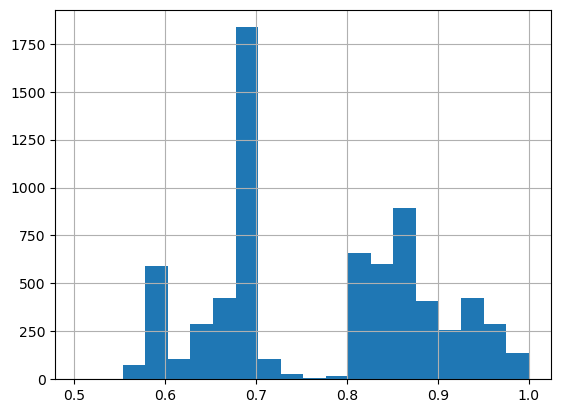

In [29]:
clust_attrb_similarity.Similarity_Ref.hist(bins = 20)

In [30]:
clust_attrb_similarity.tail()

,ClusterLabel,ClusterName,Similarity_Ref
6448,6449,FIREPLACE,0.563436
6952,6953,COOKWARE,0.563436
4721,4721,"SUNTAN FACIAL LOTION/STICK,SUNTAN LOTION,SUNTA...",0.503953
4993,4993,"MAYBELLINE,ALMAY,LOREAL COSMETICS",0.503953
5937,5938,SALLY HANSEN,0.503953


### Attribute Binary Vectors

In [11]:
def get_attribute_dict(clust_attrbs):
    return {i: int(i in clust_attrbs) for i in all_attrbs}

In [12]:
clust_attr[clust_attr.ClusterLabel == 200]['Non-Null Attributes']

200    ['Genre', 'Color', 'Size Description', 'Other ...
Name: Non-Null Attributes, dtype: object

In [13]:
get_attribute_dict(clust_attr['Non-Null Attributes'].iloc[200])

{'Seed Products': 0,
 'Mango and its derivatives': 0,
 'Sesame Seeds and Their Derivatives': 0,
 'Harvest Type': 0,
 'INE_USE_OF_PDT_TX': 1,
 '1-Naphthol': 0,
 'BTR_REQ_VLU': 0,
 'Benzyl Alcohol': 0,
 'KRG_OWN_IS_RAW_VLU': 0,
 'Card Reloadable': 0,
 'Pine Nut and Their Derivatives': 0,
 'Cocoa and its Derivatives': 0,
 'Geraniol': 0,
 'Molluscs and Their Derivatives': 0,
 'Diaminophenols': 0,
 'Flavor(s)': 0,
 'Hickory Nuts and Their Derivatives': 0,
 'Sold only at Kroger Fuel Centers': 0,
 'Pollock and its Derivatives': 0,
 'Hydroxyisohexyl 3-Cyclohexene Carboxaldehyde': 0,
 'Milk Product/Substitute': 0,
 'Size Description': 1,
 '2,5-Diaminotoluene': 0,
 'ASBD_ACU_PDT_HGT_IN_INCH': 1,
 'Citronellol': 0,
 'Card Is Closed Loop': 0,
 'Herring and its Derivatives': 0,
 'KRG_OWN_IS_CHEM_VLU': 0,
 'FIN_VLU': 0,
 'Pecan Nut and Pecan Nut Products': 0,
 'Type of Spirit': 0,
 'Crustaceans and Their Derivatives': 0,
 'Peanuts and Their Derivatives': 0,
 'Glutamate and Their Derivatives': 0,
 'T

In [14]:
clust_attr['AttributeVector'] = clust_attr['Non-Null Attributes'].apply(lambda x: list(get_attribute_dict(x).values()))

In [15]:
len(clust_attr)

7158

In [16]:
clust_attr.head()

,ClusterLabel,Cluster Name,Cluster Size,Non-Null Attributes,AttributeVector
0,0,"PARTY EVERYDAY,NOVELTY AND DECOR,GIFT-WRAP SEA...",1306,"['Color', 'Size Description', 'Other Size Desc...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,"ACCENT FURNITURE,KITCHEN/DINING,DECORATIVE ACC...",1145,"['Genre', 'Color', 'Size Description', 'Other ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2,"TEA BAGS & BULK TEA,TEA SWEETENED,TEA BAGS/HER...",1086,"['Method of Sweetening', 'Level of Sugar/Sucro...","[1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, ..."
3,3,CARDS EVERYDAY,1085,"['VND_BRN_NAM', 'NET_CONT_EQV_UOM_VIP_TO_KRG_U...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,4,"COLD WEATHER ACS,BRANDED COLLECTIONS,JUNIOR SL...",991,"['Color', 'Size Description', 'Other Size Desc...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."


In [17]:
from sklearn.cluster import HDBSCAN, KMeans
attr_vects = [i for i in clust_attr.AttributeVector]

In [18]:
hdb = HDBSCAN(min_cluster_size= 5)

In [19]:
kmeans = KMeans(n_clusters= 50, random_state=0, n_init="auto").fit(attr_vects)

In [20]:
hdb.fit(attr_vects)

HDBSCAN()

In [21]:
len(attr_vects[0])

221

In [22]:
pd.Series(hdb.labels_).value_counts().sort_values(ascending = False)

-1      2784
 123    1060
 82      592
 93      155
 127     144
        ... 
 129       5
 125       5
 36        5
 47        5
 114       5
Length: 133, dtype: int64

In [23]:
clust_attr['SuperCluster Label'] = hdb.labels_

In [24]:
clust_attr['KMeans SuperCluster Label'] = kmeans.labels_

In [64]:
clust_attr['KMeans SuperCluster Label'].value_counts()

0     1316
15     729
10     391
18     312
20     312
1      288
12     275
28     255
39     199
36     178
6      177
27     158
8      138
11     132
49     119
17     113
26     112
29     107
9      106
4      101
13      97
21      94
42      94
31      94
48      88
5       85
19      73
23      64
45      60
46      59
14      59
38      59
37      57
35      54
30      54
41      53
44      51
40      48
16      44
33      42
32      42
25      41
2       41
3       40
7       39
22      29
24      29
34      21
43      19
47      10
Name: KMeans SuperCluster Label, dtype: int64

In [457]:
clust_attr['SuperCluster Label'].value_counts()

 29    3184
 32    1279
-1      910
 31     398
 18     165
 37     133
 24     105
 39      82
 33      61
 15      59
 20      56
 22      46
 28      43
 13      35
 8       32
 4       31
 1       31
 21      30
 16      28
 23      28
 7       27
 30      27
 3       26
 26      24
 42      24
 6       23
 34      22
 0       21
 2       21
 10      20
 36      16
 14      15
 27      15
 17      14
 19      14
 35      14
 9       14
 5       14
 11      13
 12      13
 41      12
 38      12
 40      11
 25      10
Name: SuperCluster Label, dtype: int64

In [65]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', random_state= 42).fit_transform(np.array(attr_vects))

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: title={'center': 'KMeans: 2D projection of attribute-based superclusters'}>

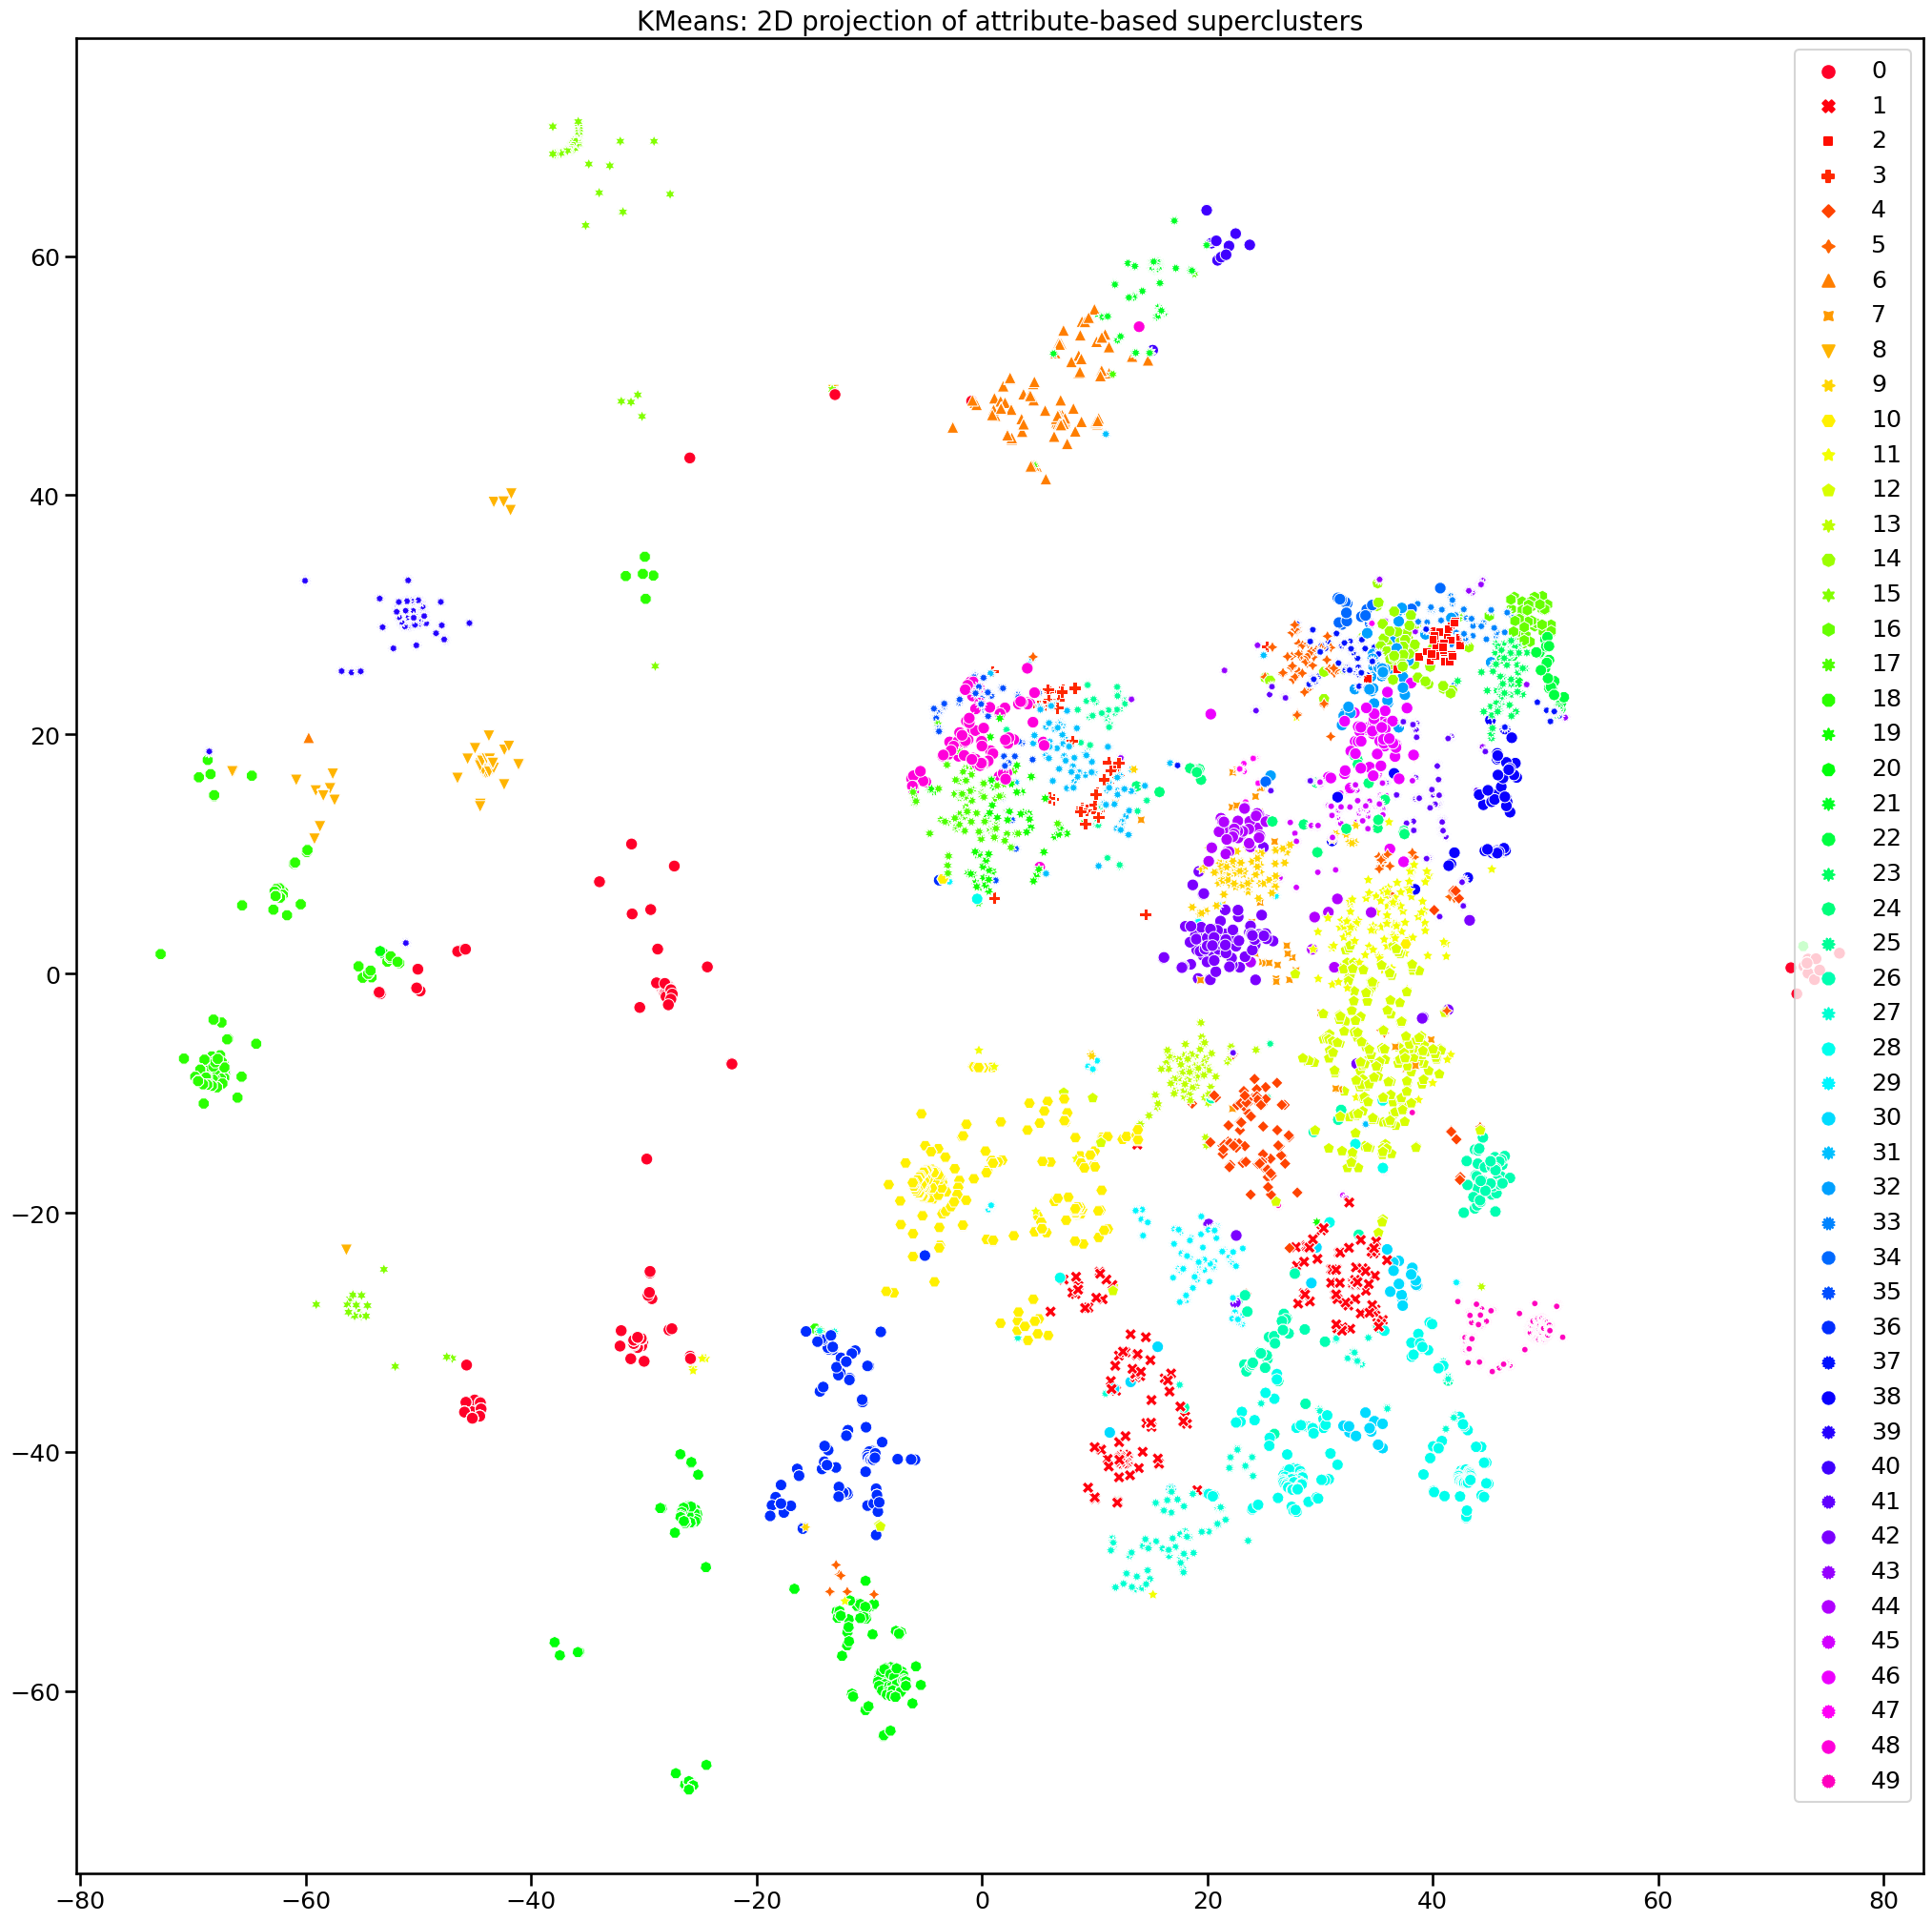

In [67]:
sns.set_context("talk", font_scale=1.1)
plt.figure(figsize=(25,25))
plt.title('KMeans: 2D projection of attribute-based superclusters')
sns.scatterplot(x=X_embedded.T[0], 
                y=X_embedded.T[1], 
                hue=kmeans.labels_,  style=kmeans.labels_,palette = "gist_rainbow",legend= 'full')

In [462]:
clust_attr[clust_attr['KMeans SuperCluster Label'] == 10].head(50)

,ClusterLabel,Cluster Name,Cluster Size,Non-Null Attributes,AttributeVector,SuperCluster Label,KMeans SuperCluster Label
ClusterLabel,,,,,,,
3,3,CARDS EVERYDAY,1085,[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",29,10
6,6,"CARDS EVERYDAY,CARD GAMES",909,[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",29,10
15,15,"CARDS EVERYDAY,CARDS SEASONAL",762,[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",29,10
21,21,"CARDS EVERYDAY,CARD EVERYDAY - SONG,CARD EVERY...",679,[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",29,10
65,65,"GIFT-WRAP EVERYDAY,GIFT-WRAP SEASONAL,NFL",405,[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",29,10
103,103,CARDS EVERYDAY,325,[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",29,10
114,114,"CARDS EVERYDAY,CARD EVERYDAY - SONG",312,[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",29,10
149,149,"CARDS EVERYDAY,NOVELTIES",258,[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",29,10
177,177,"CARDS EVERYDAY,CARDS SEASONAL,PARTY EVERYDAY",238,[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",29,10


<Axes: title={'center': '2D projection of attribute-based superclusters'}>

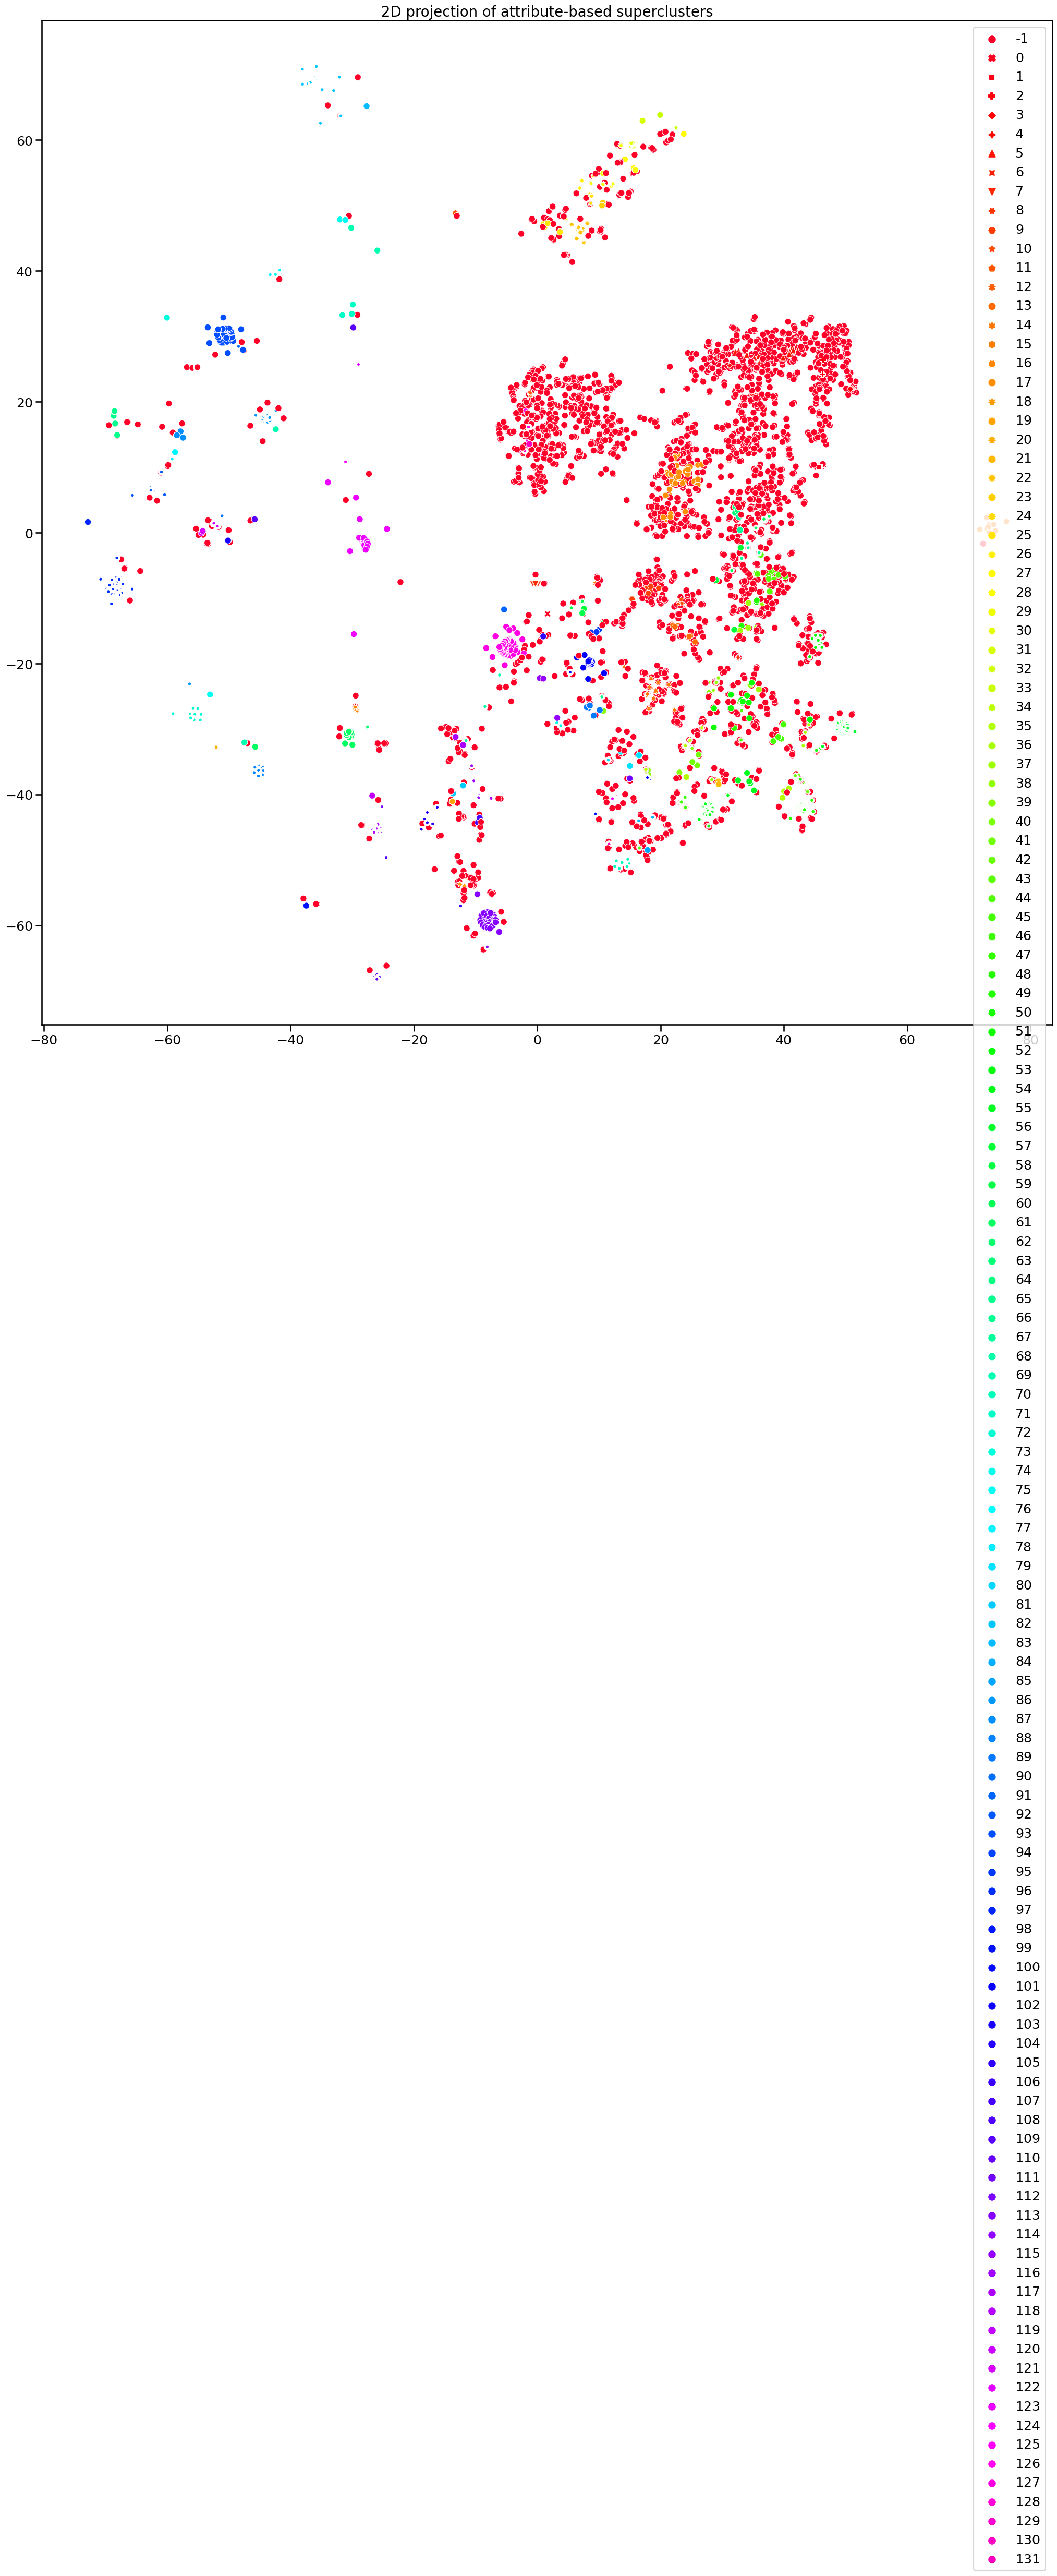

In [69]:
sns.set_context("talk", font_scale=1.1)
plt.figure(figsize=(25,25))
plt.title('2D projection of attribute-based superclusters')
sns.scatterplot(x=X_embedded.T[0], 
                y=X_embedded.T[1], 
                hue=hdb.labels_,  style=hdb.labels_,palette = "gist_rainbow",legend= 'full')

In [71]:
clust_attr.to_csv('SuperClusteringResults_081723.csv', index = None)